# STEP 1 

In [1]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def asciiDC3 (seq) : 
    asc=[]
    for i in seq : 
        asc.append(ord(i))
    
    return asc+[0,0,0]

In [3]:
def position1_2 (asc):
    ind1=[]
    ind2=[]
    for k in range(len(asc)-2):
        #attention on a peut etre fait de la merde ici, pas sure du -2
        if k%3==1 :
            ind1.append(k)
        if k%3==2:
            ind2.append(k)
    # dans le cas où T a un nombre d'élément multiple de 3, r12 ne contiendra pas le triplet [0,0,0].
    # Or, la fonction, "removesentinel" retire 1 élément notre suffix table, pour justement se débarrasser de [0,0,0]
    # J'ai donc décider de rajouter artificiellement [0,0,0] dans les cas où il n'est pas déjà là.
    if len(asc)%3==0:
        ind1.append(len(asc)-1-2)
        
    return ind1+ind2

In [4]:
print(len([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0])-3)

18


In [5]:
print(position1_2([2, 17, 7, 5, 4, 3, 12, 9, 6, 8, 10, 13, 14, 12, 11, 16, 15, 1, 0, 0, 0]))

[1, 4, 7, 10, 13, 16, 18, 2, 5, 8, 11, 14, 17]


In [6]:
def radix (p, t):
    r=[]
    for i in range(len(p)):
        index=p[i]
        r.append([t[index],t[index+1], t[index+2]])
    return r

In [7]:
def sort(array,index, alphabet, columnNumber):
    #print("array")
    #print(array)
    #print("alphabet")
    #print(alphabet)
    if len(array) == 0:
        return array

  # Perform counting sort on each column, starting at the last

    column = columnNumber
    while column>=0: # nous on met "tant que l'indice est supérieur à 3"
        array, index = countingSortByDigit(array,index, alphabet, column)
        column-=1 #change de colonne dans ton tableau

    return array, index

def countingSortByDigit(array, index, alphabet, column):
    """
    ici possibleNumbers= nombre de chiffres possibles. Nous n'avons que 4 nombres (0,97,98,99)
    """

    countIndex = -1
    count = [0] * len(alphabet)
    output = [None] * len(array)
    outputIndex= [0] * len(array)

  # Count frequencies
    for i in range(0, len(array)):
        #print("i "+str(i))
        #print("array[i] "+ str(array[i]))
        #print("column "+str(column))
        
        countIndex = alphabet[array[i][column]]
        count[countIndex] += 1

  # Compute cumulates
    for i in range(1, len(alphabet)):
        count[i] += count[i - 1]

  # Move records
    for i in range(len(array) - 1, -1, -1):
        countIndex = alphabet[array[i][column]]
        count[countIndex] -= 1
        output[count[countIndex]] = array[i]
        outputIndex[count[countIndex]]=index[i]
       
    return output, outputIndex

In [8]:
def ordre(R, index12, use_index_12=False):
    # nous renovie la liste order du genre (1,2,2,3,4,4,5)  et un booléen indiquant s'il y a répétition
    index=1
    repetition=False
    order=[1]
    
    if use_index_12:
        indexdict={index12[0]:1}
        
    for i in range(1, len(R)): 
        if R[i-1]==R[i] : 
            order.append(index)
            repetition=True
        else : 
            index+=1
            order.append(index)
            
        if use_index_12:
            indexdict[index12[i]]=i+1
    if use_index_12:
        return order, repetition, indexdict
    else: 
        return order, repetition
            

In [9]:
def Tprime(ordre, p12, indexdict):
    t=[]
    for p in p12:
        t.append(ordre[indexdict[p]-1])
    return t

In [10]:
def alphabetT(T):
    ### à changer pcq c laid
    dic={}
    a=[]
    for i in range(len(T)):
        a.append(T[i])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

In [11]:
def alphabetR0(R0):
    ### à changer pcq c laid
    dic={}
    a=[]
    for column in range(2):
        for i in range(len(R0)):
            a.append(R0[i][column])
    a.sort() ## MDR CE SORT EST A CHANGER SERGIO VA NOUS TUER
    
    for element in a:
        if not (element in dic):
            dic[element]=len(dic)
    return dic

## Testons nos fonctions sur un string simple

In [12]:
S="abcabcacab"
T=asciiDC3(S)
columnnumber=2
print(T)


[97, 98, 99, 97, 98, 99, 97, 99, 97, 98, 0, 0, 0]


In [13]:
p12=position1_2(T)
print(p12)

[1, 4, 7, 10, 2, 5, 8]


In [14]:
R12=radix(p12, T)
print(R12)

[[98, 99, 97], [98, 99, 97], [99, 97, 98], [0, 0, 0], [99, 97, 98], [99, 97, 99], [97, 98, 0]]


In [15]:
alph=alphabetT(T)
alph

{0: 0, 97: 1, 98: 2, 99: 3}

In [16]:
Rs12, index12= sort(R12,p12, alph, columnnumber)
print(Rs12)
print(index12)

[[0, 0, 0], [97, 98, 0], [98, 99, 97], [98, 99, 97], [99, 97, 98], [99, 97, 98], [99, 97, 99]]
[10, 8, 1, 4, 7, 2, 5]


In [17]:
use_index12=True
order12, boolean, index12dict =ordre(Rs12, index12,use_index12)
print(order12)
print(boolean)
print(index12dict)

[1, 2, 3, 3, 4, 4, 5]
True
{10: 1, 8: 2, 1: 3, 4: 4, 7: 5, 2: 6, 5: 7}


In [18]:
alph =alphabetT(T)
alph

{0: 0, 97: 1, 98: 2, 99: 3}

In [19]:
tprime=Tprime(order12, p12, index12dict)
print(tprime)

[3, 3, 4, 1, 4, 5, 2]


In [20]:
tprime=tprime+[0,0,0]
tprime

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]

### On répète les opérations jusqu'à avoir aucun charactère répété dans T⁽n⁾

In [21]:
p12prime=position1_2(tprime)
print(p12prime)
R12prime=radix(p12prime, tprime)
print(R12prime)
alphprime=alphabetT(tprime)
print(alphprime)
Rs12prime, index12prime= sort(R12prime,p12prime, alphprime, columnnumber)
print(Rs12prime)
print(index12prime)
order12prime, boolean, index12primedict =ordre(Rs12prime, index12prime, True)
print(order12prime)
print(boolean)
print(index12primedict)

[1, 4, 7, 2, 5]
[[3, 4, 1], [4, 5, 2], [0, 0, 0], [4, 1, 4], [5, 2, 0]]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
[[0, 0, 0], [3, 4, 1], [4, 1, 4], [4, 5, 2], [5, 2, 0]]
[7, 1, 2, 4, 5]
[1, 2, 3, 4, 5]
False
{7: 1, 1: 2, 2: 3, 4: 4, 5: 5}


# STEP 2 

In [22]:
import copy

In [23]:
def position0_R0(T, index12dict):
    #attention T se finit avec trois 0
    position=[]
    R=[]
    for i in range(len(T)-3): #on ne prend pas en compte les trois 0 sentinelle
        if i%3==0:
            position.append(i)
            if i+1<len(T)-3:
                R.append([T[i],index12dict[i+1]])
            else:
                R.append([T[i],1]) # car les sentinelles sont forcément les 1ères dans l'ordre alphabétique
    return position, R

# Testons notre fonction avec le string T

In [24]:
print(index12prime)
print(index12primedict)
print(tprime)

[7, 1, 2, 4, 5]
{7: 1, 1: 2, 2: 3, 4: 4, 5: 5}
[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]


In [25]:
p0prime, r0prime=position0_R0(tprime, index12primedict)
print(p0prime)
print(r0prime)

[0, 3, 6]
[[3, 2], [1, 4], [2, 1]]


# STEP 3

In [26]:
def merge(Tfinal, index_0, index12, index12dict) : 
    liste=[]
    A=0
    B=0
    while A<len(index_0) and B<len(index12):
        #print("rentre dans le while")
        a=index_0[A]
        b=index12[B]
        if Tfinal[a]!=Tfinal[b] :
            minimum=min(Tfinal[a], Tfinal[b])
            
            if minimum == Tfinal[a]:
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(a))
                A+=1
                liste.append(a)
            else: 
                #print("a= "+str(a)+", b= "+str(b)+", on append le "+str(b))
                B+=1
                liste.append(b)

        else :
            if b%3==1 : 
                #print(str(b)+" est congru à 1 modulo 3")
                longueur=len(liste)
                i=0
                if index12dict[a+1]<index12dict[b+1]:
                    liste.append(a)
                    A+=1
                else:
                    liste.append(b)
                    B+=1
                    
                    
            elif b%3==2 :
                #print(str(b)+"est congru à 2 modulo 3")
                if Tfinal[a+1]!=Tfinal[b+1] :
                    minimum=min(Tfinal[a], Tfinal[b])
                    if minimum == Tfinal[a]:
                        A+=1
                        liste.append(a)
                    else: 
                        B+=1
                        liste.append(b)

                else:
                    if index12dict[a+2]<index12dict[b+2]:
                        liste.append(a)
                        A+=1
                    else:
                        liste.append(b)
                        B+=1
                        

        #print("A "+str(A))
        #print("B "+str(B))
        if A==len(index_0):
            liste+=index12[B:]
                
        if B==len(index12):
            liste+=index_0[A:]

    return liste

In [27]:
def removesentinel(index):
    return index[1:]

In [28]:
def resumeHigherOrder(index012prime, P12):
    output=[]
    for element in index012prime:
        output.append(P12[element])
        
    return output

### Testons notre fonction avec le string T

In [29]:
alph0prime=alphabetR0(r0prime)
print(alph0prime)

{1: 0, 2: 1, 3: 2, 4: 3}


In [30]:
r0sprime, index0prime= sort(r0prime,p0prime, alph0prime, columnnumber-1)
print(r0sprime)
print(index0prime)

[[1, 4], [2, 1], [3, 2]]
[3, 6, 0]


In [31]:
print(tprime)
print(index0prime)
print(index12prime)

[3, 3, 4, 1, 4, 5, 2, 0, 0, 0]
[3, 6, 0]
[7, 1, 2, 4, 5]


In [32]:
index120prime=merge(tprime, index0prime, index12prime, index12primedict)
index120prime

[7, 3, 6, 0, 1, 2, 4, 5]

# Assemblage final

In [33]:
def almost_dc3(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    

    r12=radix(p12,T)


    alphabet_T=alphabetT(T)
    
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    
    use_index_12=True
    order12,repetition, index12dict=ordre(r12sorted, index12, use_index_12)

    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12dict)+[0,0,0]

        index012=almost_dc3(Tprim)


        index12=resumeHigherOrder(index012, p12)


    p0,r0=position0_R0(T, index12dict)

    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)


    order0=ordre(r0sorted, index12)
    

    index012=removesentinel(merge(T, index0, index12, index12dict))


    return index012
   
    
    

In [34]:
def almost_dc3_debugg(T):
    # T est une liste de int

    
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    print("\n")
    
    r12=radix(p12,T)
    print("r12")
    print(r12)
    print("\n")

    alphabet_T=alphabetT(T)

    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    print("index12")
    print(index12)
    print("taille de index12 avant récursion")
    print(len(index12))
    print("\n")
    
    order12,repetition, index12dict=ordre(r12sorted,index12, True)
    print("order12")
    print(order12)
    print("index12dict")
    print(index12dict)
    print("entre-t-on dans la boucle de répétition?")
    print(repetition)
    print("\n")
    

    if repetition:

        
        Tprim=Tprime(order12, p12, index12dict)+[0,0,0]
        print("tprime")
        print(Tprim)
        print("taille de tprime")
        print(len(Tprim))
        print("\n")
        
        index012=almost_dc3(Tprim)
        print("index012")
        print(index012)
        print("taille de index012")
        print(len(index012))
        print("\n")

        index12=resumeHigherOrder(index012, p12)
        print("resume higher order index12")
        print(index12)
        print("taille de index12 après retour à taille initiale")
        print(len(index12))
        print("\n")

    p0,r0=position0_R0(T, index12dict)
    print("p0")
    print(p0)
    print("taille de p0")
    print(len(p0))
    print("\n")
    
    print("r0")
    print(r0)
    print("\n")
    alphabet_r0=alphabetR0(r0)

    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    print("index0")
    print(index0)
    print("taille de index0")
    print(len(index0))
    print("\n")

    order0=ordre(r0sorted, index12)
    
    temp=merge(T, index0, index12, index12dict)
    print("taille de temp")
    print(len(temp))
    
    index012=removesentinel(merge(T, index0, index12))
    print("taille après la fonction removesentinel")
    print(len(index012))
    print("index012")
    print(index012)
    print("\n")

    return index012
   
    
    

### Testons notre fonction avec le string T

In [35]:
almost_dc3(T)

[8, 0, 3, 6, 9, 1, 4, 7, 2, 5]

## Test avec biopython 


In [36]:
pip install biopython

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
from Bio import SeqIO
genome=[]
nucleotide_genome=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/genome.fna", "fasta"):
    genome.append(seq_record)
    nucleotide_genome+=len(seq_record.seq)
print(genome[13:])

[SeqRecord(seq=Seq('tgaaccctaaaccctaaaccctaaaccctaaacccctaaaccctaaaccctgaa...gtt'), id='NC_037283.1', name='NC_037283.1', description='NC_037283.1 Plasmodium falciparum 3D7 genome assembly, chromosome: 14', dbxrefs=[]), SeqRecord(seq=Seq('ATGATAAAATTTTTAAAACCTAAAATAAAAATATTAAAAAAATTAAATATACCT...ATT'), id='NC_036769.1', name='NC_036769.1', description='NC_036769.1 Plasmodium falciparum strain 3D7, apicoplast', dbxrefs=[])]


In [38]:
reads=[]
nucleotide_reads=0
for seq_record in SeqIO.parse("/home/azarkua/Documents/2023-2024/omiques2/developement/omique2/reads.fq", "fastq"):
    reads.append(seq_record)
    nucleotide_reads+=len(seq_record.seq)
    #if len(seq_record.seq)!= 100:
    #    print("False")
print(reads[:1])

[SeqRecord(seq=Seq('TTTCCTTTTTAAGCGTTTTATTTTTTAATAAAAAAAATATAGTATTATATAGTA...TAA'), id='NC_004325.2-100000', name='NC_004325.2-100000', description='NC_004325.2-100000', dbxrefs=[])]


In [39]:
temp=genome[1].seq.upper()
print(len(temp)//4)
temp[50:60]

236775


Seq('CCCTGAACCC')

Pour l'instant, notre code met environ 2min d'attente pour faire la suffix table de 25 000 nucléotides.

In [40]:
T=asciiDC3(temp)
#print(T)

In [41]:
suffix_array=almost_dc3(T)
print(suffix_array[:100])
#print(timemeasuring)

[947101, 129, 939, 5790, 5997, 6315, 6540, 6642, 6666, 6669, 6714, 6774, 6927, 6960, 7116, 7203, 7404, 7617, 7650, 7695, 7758, 7893, 8019, 8046, 8382, 8547, 8823, 8835, 8913, 8946, 8991, 9105, 9234, 19266, 22410, 22440, 22605, 22863, 23121, 23124, 23151, 23154, 23157, 23160, 23163, 23166, 23169, 23172, 23193, 23202, 23220, 23223, 23229, 23232, 23235, 23238, 23241, 23244, 23247, 23250, 23268, 23271, 23274, 23295, 23298, 23322, 23325, 23328, 23352, 23370, 23373, 23391, 23394, 23457, 23964, 23994, 24231, 24405, 24408, 24420, 24606, 24609, 24612, 24777, 24786, 24789, 24852, 24927, 25314, 25332, 25368, 25542, 25548, 25806, 25839, 25842, 25845, 25851, 25854, 25872]


## Mesurer le temps que prend notre fonction

In [42]:
import pstats
import cProfile

In [43]:
cProfile.run("almost_dc3(T)", "dc3_stats")
p = pstats.Stats("dc3_stats")
p.sort_stats("cumulative").print_stats()

Wed Nov  1 18:17:40 2023    dc3_stats

         32003816 function calls (32003811 primitive calls) in 20.100 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   20.100   20.100 {built-in method builtins.exec}
        1    0.124    0.124   20.100   20.100 <string>:1(<module>)
      6/1    0.326    0.054   19.976   19.976 /tmp/ipykernel_39401/1646075479.py:1(almost_dc3)
       12    0.124    0.010    6.402    0.533 /tmp/ipykernel_39401/1511205218.py:1(sort)
       30    6.278    0.209    6.278    0.209 /tmp/ipykernel_39401/1511205218.py:18(countingSortByDigit)
        6    3.219    0.537    4.179    0.696 /tmp/ipykernel_39401/3410804580.py:1(merge)
        6    2.721    0.454    2.804    0.467 /tmp/ipykernel_39401/17099699.py:1(radix)
       12    1.415    0.118    1.546    0.129 /tmp/ipykernel_39401/1085424926.py:1(ordre)
        6    0.572    0.095    1.014    0.169 /tmp/ipykernel_39401/150808864

### Idées d'optimisation  
-réussir à ne plus faire appel aux fonctions "alphabet"  

### BWT à l'aide de notre suffix table

In [44]:
def BWT_suffix_table(T,end_of_string="$"):
    """
    Compute the BWT from the suffix table
    
    Args:
        T (str): string
        end_of_string (char): end of string character to append
    
    Return:
        bwt (str): BWT
    """
    T += end_of_string
    suffix_array=almost_dc3(asciiDC3(T)) 
    bwt = ""
    for i in suffix_array:
        bwt += T[i-1]
    return(bwt)

In [45]:
def run_length_encoding(S):
    """
    Encode sequence using the Run Length method
    
    Args:
        text (str): string to be shifted
    
    Return:
        str: run length
    """
    encoded_S= ""
    i=0
    number=1
    while i<len(S):
        encoded_S+=S[i]
        i+=1
        while i<len(S) and S[i-1]==S[i]:
            number+=1
            i+=1
        if number>1:
            encoded_S+=str(number)
        number=1
    return encoded_S

#### Testons notre fonction

In [46]:
test = "ACATACAGATG"
suffix_array=almost_dc3(asciiDC3(test)) 
print(suffix_array)
print(BWT_suffix_table(test))

[4, 0, 6, 2, 8, 5, 1, 10, 7, 3, 9]
GT$CCGAATAAA


In [47]:
print(run_length_encoding(BWT_suffix_table(test)))

GT$C2GA2TA3


BWT sur notre génome

In [48]:
bwt_T=BWT_suffix_table(genome[1].seq.upper(),end_of_string="$")
print(run_length_encoding(bwt_T)[:100])

ACT2C2ACA4C2AC2AC2ACGA2TGAT3C2ATA2T3ACA9TAGA10TA5TATATACTA6T2ATA2C2ATGA3GATA12GCA3G2A3TATCATA2CA2GTA


Mesurons le temps que l'opération prend

In [49]:
cProfile.run("run_length_encoding(BWT_suffix_table(genome[1].seq.upper(),end_of_string='$'))", "bwt_stats")
p = pstats.Stats("bwt_stats")
p.sort_stats("cumulative").print_stats()

Wed Nov  1 18:18:17 2023    bwt_stats

         42022468 function calls (42022463 primitive calls) in 21.682 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   21.682   21.682 {built-in method builtins.exec}
        1    0.020    0.020   21.682   21.682 <string>:1(<module>)
        1    0.439    0.439   21.200   21.200 /tmp/ipykernel_39401/548353753.py:1(BWT_suffix_table)
      6/1    0.358    0.060   19.126   19.126 /tmp/ipykernel_39401/1646075479.py:1(almost_dc3)
       12    0.126    0.010    6.865    0.572 /tmp/ipykernel_39401/1511205218.py:1(sort)
       30    6.739    0.225    6.739    0.225 /tmp/ipykernel_39401/1511205218.py:18(countingSortByDigit)
        6    3.054    0.509    4.001    0.667 /tmp/ipykernel_39401/3410804580.py:1(merge)
       12    1.798    0.150    1.948    0.162 /tmp/ipykernel_39401/1085424926.py:1(ordre)
   947103    0.332    0.000    1.367    0.000 /home/azarkua/.loc

## String search with BWT

version du prof

In [50]:
from collections import Counter

In [51]:
def last2first(counts,k,X):
    return k + sum([counts[char] for char in counts if char < X])
    
def get_first_occurrence(L,X):
    for i,l in enumerate(L):
        if l == X:
            return(i)
        
def occurrence_indexer(S):
    K = []
    last_index = {}
    for s in S:
        if s not in last_index: 
            last_index[s] = 0
        K.append(last_index[s])
        last_index[s] += 1
    return(K)
    
    
def pattern_matching_BWT(S,pattern):
    """
    Search a patter in a String using the BWT
    
    Args:
        S (str): string
        pattern (str): pattern
    
    Return:
        bool: true if the pattern is in the string    
    """
    L = BWT_suffix_table(S)
    K = occurrence_indexer(L)
    counts = Counter(L)
    e = 0
    f = len(L)
    i = len(pattern) - 1
    while e < f and i >= 0:
        X = pattern[i]
        first_occurence_in_L_ef = get_first_occurrence(L[e:f],X)
        if first_occurence_in_L_ef is None:
            return False
        else:
            r = first_occurence_in_L_ef+e
        print("first_occurence_in_L_ef")
        print(first_occurence_in_L_ef)
        print("L[e:f]")
        print(L[e:f])
        print("r")
        print(r)
        print("X")
        print(X)
        print("L[r]")
        print(L[r])
        
        last_occurence_in_L_ef = get_first_occurrence(L[e:f][::-1],X)
        if last_occurence_in_L_ef is None:
            return False
        else:
            s = f-last_occurence_in_L_ef-1
        print("last_occurence_in_L_ef")
        print(last_occurence_in_L_ef)
        print("L[e:f]")
        print(L[e:f])
        print("s")
        print(s)
        print("X")
        print(X)
        print("L[s]")
        print(L[s])
        
        
        
        e = last2first(counts,K[r],X)
        f = last2first(counts,K[s],X)+1
        i -= 1
        
        print("r")
        print(r)
        print("s")
        print(s)
        print("e")
        print(e)
        print("f")
        print(f)
    
    return(i<0)


ma version

In [52]:
def localisation_count(bwt):
    """ renvoie un tableau T tel que T[i] renvoie combien de fois bwt[i] est apparu dans bwt[:i]
    """
    localisation=[0 for i in range(len(bwt))]
    count=[0 for i in range(5)]
    for i in range(len(bwt)):
        if bwt[i]=='$':
            count[0]+=1
            localisation[i]=count[0]
            
        elif bwt[i]=='A':
            count[1]+=1
            localisation[i]=count[1]
            
        elif bwt[i]=='C':
            count[2]+=1
            localisation[i]=count[2]
            
        elif bwt[i]=='G':
            count[3]+=1
            localisation[i]=count[3]
            
        elif bwt[i]=='T':
            count[4]+=1
            localisation[i]=count[4]
            
    return localisation, count

def left_corresponding_letter(letter, alphabet, bwt, count, localisation, bwt_index):
        occurence=localisation[bwt_index]
        #find the position i in the first column
        position=sum(count[:alphabet[letter]])+occurence
        #find the letter on position i in the last column
        letter=bwt[position-1]
        return letter, position-1
    
def pattern_matching_BWT_moi(S,pattern):
    """
    Search a patter in a String using the BWT
    
    Args:
        S (str): string
        pattern (str): pattern
    
    Return:
        bool: true if the pattern is in the string    
    """
    pattern_in_S = False
    bwt=BWT_suffix_table(S)
    print("bwt")
    print(bwt)
    localisation, count= localisation_count(bwt)
    
    i=len(pattern)-1 #position de la dernière lettre du pattern
    alphabet={'$':0, 'A':1,'C':2,'G':3, 'T':4}
    la=[]
    lb=[]
    
    
    letter=pattern[i]
    # initialisation des "lettres intéressantes"
    for j in range(len(bwt)):
        if bwt[j]==letter:
            la.append(j)
            print("la initialisation")
            print(la)
    while i!=0:
        letter=pattern[i]
        print("on est à la lettre "+str(i)+ " du pattern, qui est "+ str(letter))
        i-=1
        k=0
        print("les positions des lettres interessantes sont: ")
        print(la)
        # on cherche les élèments qui correspondent à la lettre suivante de notre pattern
        for k in range(len(la)):
            index=la[k]
            right_letter=letter
            letter, position=left_corresponding_letter(right_letter, alphabet, bwt, count, localisation, index)
            
            if letter==pattern[i]:
                lb.append(position)
                print("la lettre suivante (qui est "+ str(letter)+") est à la position "+ str(position))
    
            if not lb:
                print("aucune lettre du texte ne correspond à la lettre suivante")
                return pattern_in_S
        la=lb
        lb=[]
                
        #on vérifie que la liste n'est pas vide
        
    
    pattern_in_S=True
    
    return pattern_in_S, la

#### Testons notre fonction

In [53]:
test

'ACATACAGATG'

In [54]:
localisation_count(BWT_suffix_table(test))

([1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 4, 5], [1, 5, 2, 2, 2])

In [55]:
Counter(BWT_suffix_table(test))

Counter({'G': 2, 'T': 2, '$': 1, 'C': 2, 'A': 5})

In [56]:
pattern_matching_BWT(test,'CATAC')

first_occurence_in_L_ef
3
L[e:f]
GT$CCGAATAAA
r
3
X
C
L[r]
C
last_occurence_in_L_ef
7
L[e:f]
GT$CCGAATAAA
s
4
X
C
L[s]
C
r
3
s
4
e
6
f
8
first_occurence_in_L_ef
0
L[e:f]
AA
r
6
X
A
L[r]
A
last_occurence_in_L_ef
0
L[e:f]
AA
s
7
X
A
L[s]
A
r
6
s
7
e
1
f
3
first_occurence_in_L_ef
0
L[e:f]
T$
r
1
X
T
L[r]
T
last_occurence_in_L_ef
1
L[e:f]
T$
s
1
X
T
L[s]
T
r
1
s
1
e
10
f
11
first_occurence_in_L_ef
0
L[e:f]
A
r
10
X
A
L[r]
A
last_occurence_in_L_ef
0
L[e:f]
A
s
10
X
A
L[s]
A
r
10
s
10
e
4
f
5
first_occurence_in_L_ef
0
L[e:f]
C
r
4
X
C
L[r]
C
last_occurence_in_L_ef
0
L[e:f]
C
s
4
X
C
L[s]
C
r
4
s
4
e
7
f
8


True

In [57]:
pattern_matching_BWT_moi(test,'CATAC')

bwt
GT$CCGAATAAA
la initialisation
[3]
la initialisation
[3, 4]
on est à la lettre 4 du pattern, qui est C
les positions des lettres interessantes sont: 
[3, 4]
la lettre suivante (qui est A) est à la position 6
on est à la lettre 3 du pattern, qui est A
les positions des lettres interessantes sont: 
[6]
la lettre suivante (qui est T) est à la position 1
on est à la lettre 2 du pattern, qui est T
les positions des lettres interessantes sont: 
[1]
la lettre suivante (qui est A) est à la position 10
on est à la lettre 1 du pattern, qui est A
les positions des lettres interessantes sont: 
[10]
la lettre suivante (qui est C) est à la position 4


(True, [4])

### Première tentative de mesure du temps que prend dc3 (qui ne marche pas)

Mais j'y ai investi trop de temps pour le supprimer

i assume that when a function ends, an other function begins

In [58]:
      #time variables
t0=[] #starting times of every recursion of almost_dc3
timep12=[] 
timer12=[]
timealphabet=[]
timesort=[]
timeorder=[]
trep=[]
timeTprime=[]
tBeforeHigherOrder=[]
timeresumeHigherOrder=[]
tBeforeP0=[]
timeposition0_R0=[]
timealphabetR0=[]
    
timelist=[t0,timep12,timer12,timealphabet,timesort,timeorder,trep,timeTprime,tBeforeHigherOrder,timeresumeHigherOrder,tBeforeP0,timeposition0_R0,timealphabetR0]


In [59]:
def almost_dc3_time_measuring(T):
    
    t0.append(time.time())
    # T est une liste de int
    columnNumber=2
    p12=position1_2(T)
    
    print("p12")
    print(p12)
    print("taille de p12 avant récursion")
    print(len(p12))
    
    timep12.append(time.time()-t0[-1])
    
    r12=radix(p12,T)
    timer12.append(time.time()-timep12[-1])
    
    alphabet_T=alphabetT(T)
    timealphabet.append(time.time()-timer12[-1])
    
    r12sorted, index12=sort(r12, p12, alphabet_T, columnNumber)
    timesort.append(time.time()-timealphabet[-1])
    
    order12,repetition=ordre(r12sorted)
    timeorder.append(time.time()-timesort[-1])
    
    if repetition:
        trep.append(time.time())
        
        Tprim=Tprime(order12, p12, index12)+[0,0,0]
        timeTprime.append(time.time()-trep[-1])
        
        index012=almost_dc3(Tprim)
        
        tBeforeHigherOrder.append(time.time())
        index12=resumeHigherOrder(index012, p12)
        timeresumeHigherOrder.append(time.time()-tBeforeHigherOrder[-1])
    
    print("taille de p12 après récursion")
    print(len(p12))
    
    tBeforeP0.append(time.time())
    p0,r0=position0_R0(T, index12)
    timeposition0_R0.append(time.time()-tBeforeP0[-1])
    
    alphabet_r0=alphabetR0(r0)
    timealphabetR0.append(time.time()-timeposition0_R0[-1])
    
    r0sorted, index0=sort(r0,p0,alphabet_r0 ,columnNumber-1)
    #i dont measure time here
    
    order0=ordre(r0sorted)
    #i dont measure time here
    
    index012=removesentinel(merge(T, index0, index12))
    #i dont measure time here

    return index012, timelist
   
    
    

In [60]:
length_repeating_loop=len(timeTprime)
timeTprime+=[0*i for i in range(len(t0)-length_repeating_loop)]
timeresumeHigherOrder+=[0*i for i in range(len(t0)-length_repeating_loop)]

In [61]:
time_measuring=pd.DataFrame({'p12':timep12, 
                             'r12':timer12, 
                             'alphabet':timealphabet, 
                             'sort':timesort, 
                             'order':timeorder, 
                             'Tprime':timeTprime, 
                             'HigherOrder':timeresumeHigherOrder, 
                             'P0':timeposition0_R0, 
                             'alphabetRO':timealphabetR0})

In [62]:
time_measuring

,p12,r12,alphabet,sort,order,Tprime,HigherOrder,P0,alphabetRO


In [63]:
time_measuring_melted = pd.melt(time_measuring)

<AxesSubplot:>

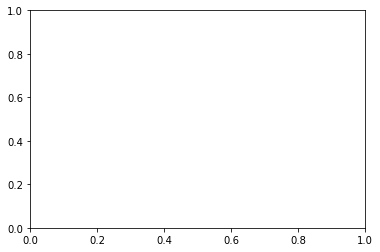

In [64]:
sns.boxplot(x='variable', y='value', data=time_measuring_melted)